In [1]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Import data and descriptive statistics

In [2]:
df_prices = pd.read_excel("Stoxx 600 Originale.xlsm", sheet_name="Price", engine="openpyxl", header=1, index_col="Dates")
df_weights = pd.read_excel("Stoxx 600 Originale.xlsm", sheet_name="Peso", engine="openpyxl", header=1, index_col="Dates")
df_daily = pd.read_excel("Stoxx 600 Originale.xlsm", sheet_name="Price daily", engine="openpyxl", header=1, index_col="Dates")

In [3]:
df_prices.head()

,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
Dates,,,,,,,,,,,,,,,,,,,,,
2002-12-31,6.54687,2.47241,18.27605,9.17238,33.5794,34.70243,41.95,20.15424,15.15,6.27089,...,46.57016,NaN,NaN,0.328,NaN,NaN,3.330,NaN,1.799,NaN
2003-01-31,5.85458,2.37867,17.53309,8.42747,30.9888,34.04929,38.57,19.33999,13.08,5.65534,...,59.75063,NaN,NaN,0.313,NaN,NaN,3.225,NaN,1.740,NaN
2003-02-28,5.84111,2.36517,16.29668,8.70416,30.2486,34.08141,36.75,18.68318,12.40,5.37017,...,53.09206,NaN,NaN,0.305,NaN,NaN,3.175,NaN,1.501,NaN
2003-03-31,5.81190,2.33054,16.12125,8.19188,28.6202,33.91623,37.31,18.12706,12.66,5.54032,...,52.84108,NaN,NaN,0.320,NaN,NaN,3.350,NaN,1.491,NaN
2003-04-30,5.68468,2.52119,17.97879,8.56458,28.9903,35.32760,36.65,18.25810,15.16,5.37285,...,69.87681,NaN,NaN,0.513,NaN,NaN,3.260,NaN,2.903,NaN


In [4]:
df_weights.head()

,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
Dates,,,,,,,,,,,,,,,,,,,,,
2002-12-31,3.754000,3.033265,2.749009,2.566902,2.398687,2.369681,2.292292,2.061552,1.854091,1.557885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-31,3.613053,3.139546,2.929012,2.520465,2.373876,2.482401,2.233168,2.112119,1.709071,1.511649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02-28,3.748959,3.246620,2.831386,2.707367,2.409883,2.584156,2.212923,2.122023,1.685044,1.492852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-31,3.839110,3.292481,2.869654,2.622410,2.353255,2.478173,2.294841,2.118960,1.789424,1.581186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-30,3.383923,3.209768,2.883989,2.803628,2.148083,2.326164,2.031438,1.923328,1.930994,1.381831,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_daily.head()

,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
Dates,,,,,,,,,,,,,,,,,,,,,
2002-01-01,8.72226,4.18054,28.14317,11.47251,39.5749,40.52545,56.90,23.91002,28.96,7.70956,...,18.35674,NaN,NaN,1.088,NaN,NaN,4.145,NaN,10.090,NaN
2002-01-02,8.48942,4.02933,27.33882,11.29900,38.8841,39.68591,54.40,23.71722,27.85,7.57813,...,18.21234,NaN,NaN,1.088,NaN,NaN,4.100,NaN,10.637,NaN
2002-01-03,8.56310,4.18204,28.10616,11.59081,39.3282,38.92710,54.90,23.72699,29.45,7.69878,...,18.21234,NaN,NaN,1.088,NaN,NaN,4.120,NaN,10.935,NaN
2002-01-04,8.59106,4.22866,27.72348,11.78465,39.4022,38.62622,54.80,23.72319,29.38,7.70455,...,18.21234,NaN,NaN,1.115,NaN,NaN,3.975,NaN,10.935,NaN
2002-01-07,8.55836,4.16140,27.40609,11.66068,38.9087,38.80380,54.45,23.74358,28.90,7.65664,...,18.15013,NaN,NaN,1.113,NaN,NaN,4.045,NaN,10.935,NaN


In [6]:
df_prices.dtypes

BP PLC                     float64
Vodafone Group PLC         float64
GlaxoSmithKline PLC        float64
HSBC Holdings PLC          float64
TOTAL SA                   float64
                            ...   
Tritax Big Box REIT PLC    float64
Bechtle AG                 float64
DiaSorin SpA               float64
Evotec AG                  float64
Linde PLC                  float64
Length: 1255, dtype: object

In [7]:
type(df_prices.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
type(df_daily.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [9]:
df_daily.dtypes

BP PLC                     float64
Vodafone Group PLC         float64
GlaxoSmithKline PLC        float64
HSBC Holdings PLC          float64
TOTAL SA                   float64
                            ...   
Tritax Big Box REIT PLC    float64
Bechtle AG                 float64
DiaSorin SpA               float64
Evotec AG                  float64
Linde PLC                  float64
Length: 1255, dtype: object

In [10]:
type(df_weights.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [11]:
df_weights.dtypes

BP PLC                     float64
Vodafone Group PLC         float64
GlaxoSmithKline PLC        float64
HSBC Holdings PLC          float64
TOTAL SA                   float64
                            ...   
Tritax Big Box REIT PLC    float64
Bechtle AG                 float64
DiaSorin SpA               float64
Evotec AG                  float64
Linde PLC                  float64
Length: 1255, dtype: object

In [12]:
df_weights.describe()

,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
count,192.000000,192.000000,192.000000,192.000000,192.000000,178.000000,31.000000,178.000000,192.000000,31.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
mean,2.190172,1.729845,1.616376,2.347708,1.758955,2.098274,1.952322,2.366142,0.729499,1.306326,...,0.030809,0.029690,0.032507,0.028985,0.028754,0.029531,0.026948,0.027141,0.028231,0.742305
std,0.779679,0.677042,0.458172,0.381681,0.293210,0.400004,0.158535,0.521661,0.487995,0.120635,...,0.000749,0.001304,0.001740,0.001445,0.002068,0.000743,0.001992,0.001746,0.003055,0.361030
min,1.122954,0.569168,0.862158,1.507279,1.276902,1.231054,1.740615,1.493689,0.120334,1.111980,...,0.030192,0.028523,0.030755,0.027356,0.026391,0.028899,0.024777,0.025144,0.026322,0.487018
25%,1.524696,1.060766,1.265917,2.050963,1.531236,1.814424,1.856978,1.810969,0.318267,1.230821,...,0.030392,0.028987,0.031643,0.028421,0.028013,0.029121,0.026075,0.026521,0.026469,0.614661
50%,1.983288,1.761540,1.509147,2.302297,1.721807,2.109596,1.890811,2.571848,0.520622,1.279614,...,0.030593,0.029451,0.032531,0.029487,0.029635,0.029343,0.027373,0.027898,0.026617,0.742305
75%,2.869387,2.049782,1.967345,2.644705,1.963509,2.373016,2.043887,2.800922,1.092953,1.357958,...,0.031117,0.030274,0.033382,0.029799,0.029935,0.029846,0.028033,0.028139,0.029186,0.869949
max,3.839110,3.314793,2.929012,3.278621,2.415685,2.910961,2.294841,3.150556,1.931830,1.581186,...,0.031642,0.031097,0.034234,0.030111,0.030235,0.030350,0.028693,0.028380,0.031755,0.997592


In [13]:
df_daily.describe()

,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
count,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,...,4414.000000,3437.000000,1282.000000,4414.000000,431.000000,1301.000000,4414.000000,2968.000000,4414.000000,25.000000
mean,6.453731,2.566730,17.794789,8.767624,43.590733,49.945179,50.095911,41.691694,10.021899,7.370977,...,822.065973,6.018404,12.615246,18.709300,43.213730,1.561873,21.436544,37.075188,4.447267,140.150000
std,1.426730,0.412331,2.858235,1.961859,6.697610,16.350648,4.246681,18.547576,6.050525,0.654547,...,732.358097,3.665155,3.810708,27.802987,3.342524,0.160886,20.197937,20.805650,4.073890,3.492015
min,3.698570,1.557060,10.682340,3.324510,27.287900,26.813830,33.490000,16.147000,1.371000,4.876020,...,17.782990,1.331320,6.210000,0.275000,38.865700,1.163360,2.495000,10.865000,0.550000,134.700000
25%,5.381115,2.355620,15.926690,7.514527,38.811250,37.700665,51.600000,25.211517,5.070000,7.633250,...,194.959068,2.996870,9.123750,3.425000,40.620715,1.485880,8.155000,22.967500,2.430000,137.450000
50%,5.993845,2.560725,17.830215,8.222210,42.685000,42.959370,51.600000,37.948450,7.995000,7.633250,...,526.552210,4.163640,11.765000,6.491500,41.814540,1.621410,12.876500,31.000000,3.126000,139.800000
75%,7.395805,2.839823,19.439433,10.628877,48.418750,65.019797,51.600000,57.584360,14.480000,7.633250,...,1514.290730,9.567600,16.250000,19.102500,45.588500,1.675970,31.120000,47.752500,4.079750,142.950000
max,10.279440,4.228660,28.875220,13.356580,63.050000,97.948920,62.900000,78.776740,29.450000,8.631470,...,2435.967880,14.938930,20.780000,153.400000,52.215750,1.834290,89.900000,98.200000,22.950000,146.850000


In [14]:
df_prices.describe()

,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,...,192.000000,159.000000,59.000000,192.000000,20.000000,60.000000,192.000000,137.000000,192.000000,2.000000
mean,6.347692,2.561971,17.441031,8.642001,44.033244,50.520282,49.949896,42.908554,9.516224,7.369277,...,872.648867,6.055881,12.640763,20.020130,43.240118,1.567888,22.648484,37.258307,4.396333,142.675000
std,1.350617,0.401844,2.441043,1.939328,6.793030,16.826690,4.061933,18.643376,5.825311,0.658194,...,731.053124,3.709128,3.808904,28.553082,3.649818,0.162455,20.411263,20.972517,4.179337,3.075914
min,3.893040,1.653040,11.732850,4.269490,28.620200,28.160990,36.650000,17.785650,1.620000,5.283980,...,46.570160,1.493810,6.255000,0.305000,39.372790,1.199250,3.175000,11.300000,0.560000,140.500000
25%,5.392143,2.364305,15.769628,7.474650,38.910000,37.428170,51.600000,26.456005,5.022500,7.633250,...,221.717543,3.050560,9.092500,3.863750,40.477937,1.520922,8.611250,23.000000,2.488750,141.587500
50%,5.867740,2.563765,17.691130,8.078560,42.970000,43.134075,51.600000,40.645645,7.112500,7.633250,...,555.926800,4.163640,11.790000,6.887500,41.400995,1.614045,13.720000,30.840000,3.052000,142.675000
75%,7.149617,2.816565,19.288320,10.466295,49.075000,65.460995,51.600000,60.455250,13.657500,7.633250,...,1588.480667,9.740485,16.105000,20.225750,45.804350,1.683428,32.526250,48.640000,4.049500,143.762500
max,9.904260,3.553680,22.436270,12.943590,60.260000,94.479020,54.000000,76.244390,27.350000,8.041170,...,2404.681230,14.938930,20.120000,141.400000,51.118790,1.817990,89.650000,97.700000,22.060000,144.850000


# Functions

In [15]:
def get_cap_group(df, date, cap_level):
    """
    Restituisce la lista di aziende (colonne) che appartengono a una determinata fascia
    di capitalizzazione basata sui pesi in una data specifica.

    cap_level:
        1 = small cap (0–20%)
        2 = mid cap (20–50%)
        3 = large cap (50–100%)
    """
    # Converti data se serve
    date = pd.to_datetime(date)

    # Estrai la riga relativa alla data
    row = df.loc[date].dropna()

    # Ordina le aziende per peso
    sorted_row = row.sort_values()

    n = len(sorted_row)

    if cap_level == 1:
        selected = sorted_row.iloc[:int(n * 0.2)]
    elif cap_level == 2:
        selected = sorted_row.iloc[int(n * 0.2):int(n * 0.5)]
    elif cap_level == 3:
        selected = sorted_row.iloc[int(n * 0.5):]
    else:
        raise ValueError("cap_level deve essere 1 (small), 2 (mid) o 3 (large).")

    return list(selected.index)

In [16]:
def compute_skewmax_filtered(df_returns, companies, reference_date, min_valid_ratio=0.8):
    """
    Calcola lo SKEWMAX (massimo rendimento giornaliero) per il mese precedente alla reference_date
    solo per le aziende con almeno una copertura pari a `min_valid_ratio`.

    Parametri:
    - df_returns: DataFrame con rendimenti giornalieri (index datetime, colonne = aziende)
    - companies: lista di aziende
    - reference_date: fine mese come stringa o datetime
    - min_valid_ratio: soglia minima di completezza (es. 0.8 = 80%)

    Ritorna:
    - Series con skewmax per le aziende con dati sufficienti
    """
    reference_date = pd.to_datetime(reference_date)
    month_start = (reference_date - relativedelta(months=1)).replace(day=1)
    month_end = reference_date - pd.offsets.MonthBegin(1)

    # Finestra temporale: mese t-1
    df_month = df_returns.loc[month_start:month_end, companies]

    # Conta giorni validi per ciascuna azienda
    valid_counts = df_month.notna().sum()
    total_days = len(df_month)

    # Filtra aziende con copertura sufficiente
    sufficient_companies = valid_counts[valid_counts >= total_days * min_valid_ratio].index

    # Calcola skewmax solo per le aziende valide
    skewmax_series = df_month[sufficient_companies].max()

    return skewmax_series

In [17]:
def select_skew_companies(skew_series, pct):
    """
    Restituisce i titoli nel X% della distribuzione di skewness.

    Parametri:
    - skew_series: pd.Series con skewness per azienda (indice = nome azienda)
    - pct: percentuale

    Output:
    - Lista dei nomi delle aziende nel X%
    """
    n = int(len(skew_series) * pct)
    selected = skew_series.sort_values().iloc[:n]
    return list(selected.index)

In [18]:
def compute_momentum_monthly(df_prices, companies, reference_date, x =12, min_valid_ratio=0.8):
    """
    Calcola il momentum (rendimento cumulato) da t-12 a t-2,
    solo per aziende con almeno min_valid_ratio dei dati necessari.

    Parametri:
    - df_prices: DataFrame con prezzi mensili (indice datetime)
    - companies: lista di aziende
    - reference_date: data di riferimento (fine mese)
    - min_valid_ratio: soglia minima di disponibilità dati richiesta (es. 0.8 = 80%)

    Output:
    - Series con momentum calcolato solo sulle aziende valide
    """
    reference_date = pd.to_datetime(reference_date, dayfirst=True)

    start = reference_date - pd.DateOffset(months=x)
    end = reference_date - pd.DateOffset(months=2)

    df_sub = df_prices[companies].copy().sort_index()

    # Trova le date più vicine disponibili
    try:
        start_date = df_sub.index[df_sub.index.get_indexer([start], method='bfill')[0]]
        end_date = df_sub.index[df_sub.index.get_indexer([end], method='ffill')[0]]
    except IndexError:
        return pd.Series(dtype=float)

    df_window = df_sub.loc[start_date:end_date]

    # Calcola copertura per ciascuna azienda
    valid_counts = df_window.notna().sum()
    total_months = len(df_window)

    sufficient = valid_counts[valid_counts >= total_months * min_valid_ratio].index

    if len(sufficient) == 0:
        return pd.Series(dtype=float)

    price_start = df_window.loc[start_date, sufficient]
    price_end = df_window.loc[end_date, sufficient]

    momentum = (price_end / price_start) - 1
    return momentum

In [19]:
def select_momentum(momentum_series, pct):
    """
    Seleziona le aziende nel top X% per momentum.

    Parametri:
    - momentum_series: pd.Series con valori di momentum (indice = aziende)
    - pct: percentuale

    Output:
    - Lista delle aziende selezionate
    """
    n = int(len(momentum_series) * pct)
    top = momentum_series.sort_values(ascending=False).iloc[:n]
    return list(top.index)


In [20]:
def run_skew_momentum_strategy(df_prices, df_weights, df_daily, start_date, end_date, x=12,
                               skew_pct=0.2, momentum_pct=0.2, cap_level=3):
    """
    Esegue una strategia long-short basata su skewness attesa (SKEWMAX) e momentum.

    Parametri:
    - df_prices: DataFrame con prezzi mensili
    - df_weights: DataFrame con pesi/capitalizzazioni mensili
    - df_daily: DataFrame con prezzi giornalieri
    - start_date, end_date: stringa o datetime (es: '2003-01-31')
    - x: window for momentum
    - skew_pct: percentuale di titoli con skewness bassa (per il long)
    - momentum_pct: percentuale di titoli con momentum alto (per il long)
    - cap_level: livello di capitalizzazione (1=small, 2=mid, 3=large)

    Output:
    - DataFrame con rendimenti mensili della strategia long-short
    """
    all_dates = df_prices.index[(df_prices.index >= start_date) & (df_prices.index <= end_date)]
    strategy_returns = []

    for ref_date in all_dates:
        companies = get_cap_group(df_weights, ref_date, cap_level=cap_level)
        if len(companies) < 10:
            continue

        skew_series = compute_skewmax_filtered(df_daily.pct_change(), companies, ref_date)

        # LONG: bassa skew + alto momentum
        low_skew = select_skew_companies(skew_series, skew_pct)
        momentum_low_skew = compute_momentum_monthly(df_prices, low_skew, ref_date, x)
        long_companies = select_momentum(momentum_low_skew, momentum_pct)

        # SHORT: alta skew + basso momentum
        high_skew = select_skew_companies(-skew_series, skew_pct)
        momentum_high_skew = compute_momentum_monthly(df_prices, high_skew, ref_date, x)
        short_companies = select_momentum(-momentum_high_skew, momentum_pct)

        try:
            next_date = df_prices.index[df_prices.index.get_indexer([ref_date], method='ffill')[0] + 1]
        except IndexError:
            continue

        price_start = df_prices.loc[ref_date]
        price_end = df_prices.loc[next_date]

        # LONG leg weighted return
        long_prices_start = price_start[long_companies]
        long_prices_end = price_end[long_companies]
        long_weights = long_prices_start / long_prices_start.sum()
        long_return = ((long_prices_end - long_prices_start) / long_prices_start) @ long_weights

        # SHORT leg weighted return
        short_prices_start = price_start[short_companies]
        short_prices_end = price_end[short_companies]
        short_weights = short_prices_start / short_prices_start.sum()
        short_return = ((short_prices_end - short_prices_start) / short_prices_start) @ short_weights

        net_return = long_return - short_return
        strategy_returns.append(net_return)

    return pd.DataFrame({'long_short': strategy_returns}, index=all_dates[:len(strategy_returns)])


Returns are computed as Weighted average return between long leg and short leg. 

In [21]:
def analyze_strategy_metrics(df,
                              market_col='stoxx600_monthly_return',
                              strategy_col='long_short',
                              rf_col='IRX_yield'):
    """
    Calcola le metriche di performance per una strategia long-short, usando
    un tasso privo di rischio mensile variabile (es. IRX_yield).

    Parametri:
    - df: DataFrame con le colonne richieste
    - market_col: rendimento mensile del benchmark (es. STOXX600)
    - strategy_col: rendimento mensile della strategia
    - rf_col: nome della colonna con il tasso risk-free mensile (espresso in %)

    Ritorna:
    - Dizionario con alpha CAPM, FF3, Sharpe, Sortino, Information ratio, volatilità e max drawdown.
    """

    # Colonne richieste
    required_cols = [strategy_col, market_col, rf_col, 'Mkt-RF', 'SMB', 'HML']
    cols_to_keep = [col for col in required_cols if col in df.columns]
    df = df[cols_to_keep].dropna().copy()

    # Calcolo dell’excess return usando tasso risk-free mensile variabile (espresso in %)
    df['rf_monthly'] = df[rf_col] / 100
    df['excess_return'] = df[strategy_col] - df['rf_monthly']

    # --- CAPM alpha ---
    X_capm = sm.add_constant(df[market_col])
    y = df[strategy_col]
    capm_model = sm.OLS(y, X_capm).fit()
    capm_alpha = capm_model.params['const']
    capm_tstat = capm_model.tvalues['const']

    # --- FF3 alpha (se presenti i fattori)
    if set(['Mkt-RF', 'SMB', 'HML']).issubset(df.columns):
        X_ff3 = sm.add_constant(df[['Mkt-RF', 'SMB', 'HML']])
        y_ff3 = df[strategy_col]
        ff3_model = sm.OLS(y_ff3, X_ff3).fit()
        ff3_alpha = ff3_model.params['const']
        ff3_tstat = ff3_model.tvalues['const']
    else:
        ff3_alpha = None
        ff3_tstat = None

    # --- Sharpe Ratio ---
    sharpe = df['excess_return'].mean() / df['excess_return'].std()

    # --- Sortino Ratio ---
    downside_std = df.loc[df['excess_return'] < 0, 'excess_return'].std()
    sortino = df['excess_return'].mean() / downside_std if downside_std > 0 else np.nan

    # --- Information Ratio ---
    active_return = df[strategy_col] - df[market_col]
    info_ratio = active_return.mean() / active_return.std()

    # --- Volatilità annualizzata ---
    volatility_ann = df[strategy_col].std() * np.sqrt(12)

    # --- Downside volatility annualizzata ---
    downside_vol_ann = downside_std * np.sqrt(12)

    # --- Maximum Drawdown ---
    cumulative = (1 + df[strategy_col]).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    max_drawdown = drawdown.min()

    return {
        'CAPM alpha': capm_alpha,
        'CAPM t-stat': capm_tstat,
        'FF3 alpha': ff3_alpha,
        'FF3 t-stat': ff3_tstat,
        'Sharpe ratio': sharpe,
        'Sortino ratio': sortino,
        'Information ratio': info_ratio,
        'Annualized volatility': volatility_ann,
        'Downside volatility': downside_vol_ann,
        'Max drawdown': max_drawdown
    }


In [ ]:
def run_skew_momentum_strategy_vol(df_prices, df_weights, df_daily, start_date, end_date, x=12,
                                   skew_pct=0.2, momentum_pct=0.2, cap_level=3,
                                   vol_window=6, target_annual_vol=0.12):
    """
    Esegue una strategia long-short basata su skewness attesa (SKEWMAX) e momentum,
    con gestione del rischio secondo Barroso & Santa-Clara (2015).

    Output:
    - DataFrame con rendimenti scalati della strategia
    """

    all_dates = df_prices.index[(df_prices.index >= start_date) & (df_prices.index <= end_date)]
    strategy_returns = []
    adjusted_returns = []
    valid_dates = []

    for ref_date in all_dates:
        companies = get_cap_group(df_weights, ref_date, cap_level=cap_level)
        if len(companies) < 10:
            continue

        skew_series = compute_skewmax_filtered(df_daily.pct_change(), companies, ref_date)

        # LONG: bassa skew + alto momentum
        low_skew = select_skew_companies(skew_series, skew_pct)
        momentum_low_skew = compute_momentum_monthly(df_prices, low_skew, ref_date, x)
        long_companies = select_momentum(momentum_low_skew, momentum_pct)

        # SHORT: alta skew + basso momentum
        high_skew = select_skew_companies(-skew_series, skew_pct)
        momentum_high_skew = compute_momentum_monthly(df_prices, high_skew, ref_date, x)
        short_companies = select_momentum(-momentum_high_skew, momentum_pct)

        try:
            next_date = df_prices.index[df_prices.index.get_indexer([ref_date], method='ffill')[0] + 1]
        except IndexError:
            continue

        price_start = df_prices.loc[ref_date]
        price_end = df_prices.loc[next_date]

        # LONG leg weighted return
        long_prices_start = price_start[long_companies]
        long_prices_end = price_end[long_companies]
        long_weights = long_prices_start / long_prices_start.sum()
        long_return = ((long_prices_end - long_prices_start) / long_prices_start) @ long_weights

        # SHORT leg weighted return
        short_prices_start = price_start[short_companies]
        short_prices_end = price_end[short_companies]
        short_weights = short_prices_start / short_prices_start.sum()
        short_return = ((short_prices_end - short_prices_start) / short_prices_start) @ short_weights

        net_return = long_return - short_return
        strategy_returns.append(net_return)
        valid_dates.append(next_date)

        # Risk management: scaling sulla base della volatilità rolling
        if len(strategy_returns) >= vol_window:
            realized_vol = pd.Series(strategy_returns[-vol_window:]).std()
            target_vol_monthly = target_annual_vol / (12 ** 0.5)
            scaling_weight = target_vol_monthly / realized_vol if realized_vol > 0 else 1.0
        else:
            scaling_weight = 1.0

        adjusted_returns.append(scaling_weight * net_return)

    return pd.DataFrame({'long_short_scaled': adjusted_returns}, index=valid_dates)

# Big Cap

In [22]:
# Strategia solo su large cap
results_big = run_skew_momentum_strategy(df_prices, df_weights, df_daily,
                                     start_date="2004-04-01", end_date="2018-11-30", x=12,
                                     skew_pct=0.2, momentum_pct=0.2, cap_level=3)

In [23]:
results_big['cumulative_return'] = (1 + results_big['long_short']).cumprod() - 1
results_big

,long_short,cumulative_return
Dates,,
2004-04-30,0.008130,0.008130
2004-05-31,-0.026093,-0.018175
2004-06-30,0.067695,0.048290
2004-07-30,0.050899,0.101647
2004-08-31,0.070824,0.179670
...,...,...
2018-06-29,-0.087021,10.855597
2018-07-31,-0.051367,10.246606
2018-08-31,0.081687,11.165306


In [24]:
stoxx600_returns = pd.read_csv("STOCXX600.csv", index_col = "Dates")
stoxx600_returns.dropna(inplace=True)
stoxx600_returns

,stoxx600_monthly_return,stoxx600_cumulative_return
Dates,,
2004-05-01,-0.008868,-0.008868
2004-06-01,0.016587,0.007572
2004-07-01,-0.018517,-0.011086
2004-08-01,-0.011717,-0.022673
2004-09-01,0.017592,-0.005480
...,...,...
2018-07-01,0.030742,0.638193
2018-08-01,-0.023876,0.599080
2018-09-01,0.002407,0.602928


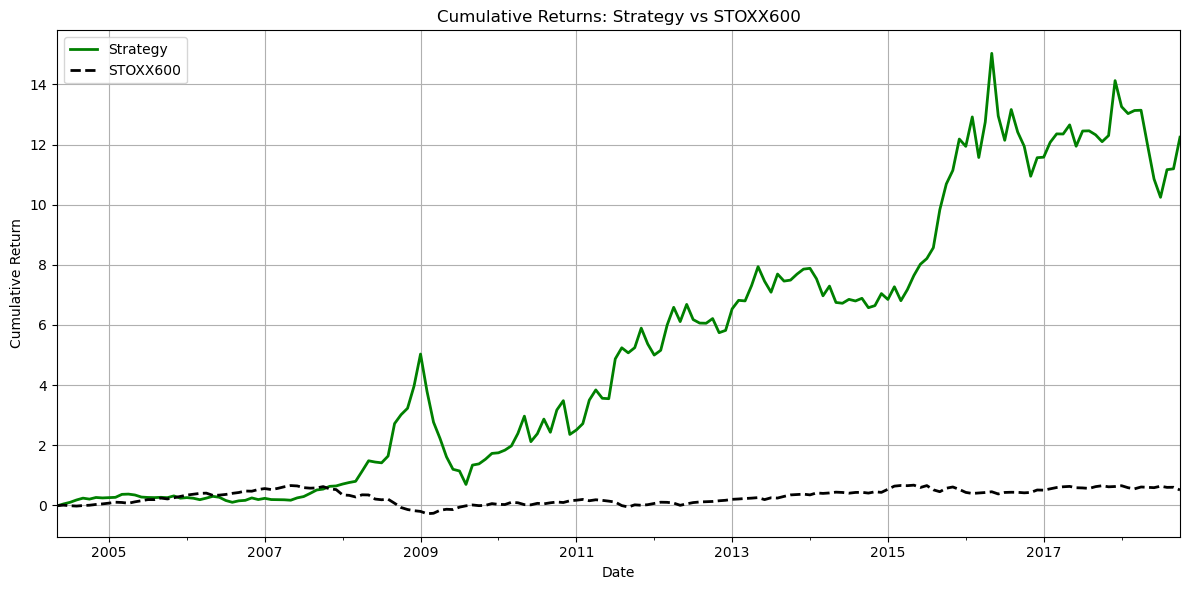

In [25]:
# Converti gli indici a 'periodo mensile' per entrambi i DataFrame
results_big.index = pd.to_datetime(results_big.index).to_period('M')
stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

# Fai join sulle date mensili
aligned_big = results_big[['cumulative_return']].join(
    stoxx600_returns[['stoxx600_cumulative_return']],
    how='inner'
)

# Torna a datetime per plotting (opzionale ma utile)
aligned_big.index = aligned_big.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
aligned_big['cumulative_return'].plot(label='Strategy', linewidth=2, color='green')
aligned_big['stoxx600_cumulative_return'].plot(label='STOXX600', linewidth=2, linestyle='--', color='black')

plt.title("Cumulative Returns: Strategy vs STOXX600")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
# Se gli indici non sono PeriodIndex, converti a periodo mensile
if not isinstance(results_big.index, pd.PeriodIndex):
    results_big.index = pd.to_datetime(results_big.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

# Join tra i due DataFrame sullo stesso indice mensile
df_big = results_big[['long_short']].join(
    stoxx600_returns[['stoxx600_monthly_return']],
    how='inner'
)

# Converti l'indice a datetime per plotting o regressione
df_big.index = df_big.index.to_timestamp()

df_big

,long_short,stoxx600_monthly_return
Dates,,
2004-05-01,-0.026093,-0.008868
2004-06-01,0.067695,0.016587
2004-07-01,0.050899,-0.018517
2004-08-01,0.070824,-0.011717
2004-09-01,0.051672,0.017592
...,...,...
2018-06-01,-0.087021,-0.008171
2018-07-01,-0.051367,0.030742
2018-08-01,0.081687,-0.023876


In [27]:
# Carica il file saltando le intestazioni iniziali
df_3ff = pd.read_csv("Europe_3_Factors.csv", skiprows=3)

# Rinomina la prima colonna in 'Date'
df_3ff.rename(columns={df_3ff.columns[0]: "Date"}, inplace=True)

# Rimuove righe dove 'Date' è NaN o ha solo spazi
df_3ff = df_3ff[df_3ff['Date'].notna()]
df_3ff['Date'] = df_3ff['Date'].astype(str).str.strip()

# Tieni solo le righe con formato corretto (6 cifre)
df_3ff = df_3ff[df_3ff['Date'].str.match(r'^\d{6}$')]

# Converte 'Date' in datetime
df_3ff['Date'] = pd.to_datetime(df_3ff['Date'], format='%Y%m')

# Imposta 'Date' come indice
df_3ff.set_index('Date', inplace=True)

# Converte tutte le colonne numeriche in float
df_3ff = df_3ff.apply(pd.to_numeric, errors='coerce')

# Visualizza anteprima
df_3ff


,Mkt-RF,SMB,HML,RF
Date,,,,
1990-07-01,4.46,0.29,-1.52,0.68
1990-08-01,-10.88,0.18,-0.30,0.66
1990-09-01,-12.19,1.98,0.44,0.60
1990-10-01,6.45,-2.63,-1.12,0.68
1990-11-01,-0.42,-2.60,0.57,0.57
...,...,...,...,...
2024-12-01,-2.42,1.10,1.61,0.37
2025-01-01,5.83,-3.63,-0.20,0.37
2025-02-01,2.68,-2.76,4.25,0.33


In [28]:
# Assicura che df_3ff abbia PeriodIndex mensile
if not isinstance(df_3ff.index, pd.PeriodIndex):
    df_3ff.index = df_3ff.index.to_period('M')

# Assicura che anche df_big abbia PeriodIndex mensile prima della join
if not isinstance(df_big.index, pd.PeriodIndex):
    df_big.index = pd.to_datetime(df_big.index).to_period('M')

# Esegui la join
df_big = df_big.join(
    df_3ff[['Mkt-RF', 'SMB', 'HML']],
    how='inner'
)

# Riconverti l'indice in datetime per regressione o plotting
df_big.index = df_big.index.to_timestamp()

# Visualizza anteprima
df_big.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML
2004-05-01,-0.026093,-0.008868,1.42,-1.01,-0.89
2004-06-01,0.067695,0.016587,1.98,1.11,0.99
2004-07-01,0.050899,-0.018517,-3.12,0.08,0.45
2004-08-01,0.070824,-0.011717,0.37,-0.46,1.32
2004-09-01,0.051672,0.017592,4.01,0.22,0.74


In [29]:
df_irx = pd.read_csv("irx_yield_2004_2018.csv", index_col = "Date")
df_irx.index = pd.PeriodIndex(df_irx.index, freq='M')
df_irx

,IRX_yield
Date,
2004-04,0.952
2004-05,1.052
2004-06,1.303
2004-07,1.412
2004-08,1.568
...,...
2018-07,1.985
2018-08,2.055
2018-09,2.150


In [30]:
# Assicura che df_3ff abbia PeriodIndex mensile
if not isinstance(df_irx.index, pd.PeriodIndex):
    df_irx.index = df_irx.index.to_period('M')

# Assicura che anche df_big abbia PeriodIndex mensile prima della join
if not isinstance(df_big.index, pd.PeriodIndex):
    df_big.index = pd.to_datetime(df_big.index).to_period('M')

# Esegui la join
df_big = df_big.join(
    df_irx[['IRX_yield']],
    how='inner'
)

# Riconverti l'indice in datetime per regressione o plotting
df_big.index = df_big.index.to_timestamp()

# Visualizza anteprima
df_big.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML,IRX_yield
2004-05-01,-0.026093,-0.008868,1.42,-1.01,-0.89,1.052
2004-06-01,0.067695,0.016587,1.98,1.11,0.99,1.303
2004-07-01,0.050899,-0.018517,-3.12,0.08,0.45,1.412
2004-08-01,0.070824,-0.011717,0.37,-0.46,1.32,1.568
2004-09-01,0.051672,0.017592,4.01,0.22,0.74,1.674


In [31]:
results_big = analyze_strategy_metrics(
    df=df_big,
    market_col='stoxx600_monthly_return',
    strategy_col='long_short',
    rf_col="IRX_yield"
)

for metric, value in results_big.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, (float, int)) else f"{metric}: {value}")


CAPM alpha: 0.0204
CAPM t-stat: 3.0015
FF3 alpha: 0.0213
FF3 t-stat: 3.1009
Sharpe ratio: 0.0707
Sortino ratio: 0.1194
Information ratio: 0.1479
Annualized volatility: 0.3156
Downside volatility: 0.1913
Max drawdown: -0.7189


## With volatility strategy

In [62]:
results_big_vol = run_skew_momentum_strategy_vol(
    df_prices=df_prices,         # prezzi mensili con indice datetime
    df_weights=df_weights,       # capitalizzazioni/pesi mensili
    df_daily=df_daily,            # prezzi giornalieri (usati per skew)
    start_date="2004-04-01",
    end_date="2018-11-30",
    x=6,                             # momentum da t-12 a t-2
    skew_pct=0.2,                     # prendi bottom/top 20% skew
    momentum_pct=0.2,                 # prendi top/bottom 20% momentum
    cap_level=3,                      # solo large cap
    vol_window=3,                     # rolling window di 6 mesi
    target_annual_vol=0.12            # target volatility annualizzata
)

In [ ]:
results_big_vol['cumulative_return'] = (1 + results_big_vol['long_short_scaled']).cumprod() - 1
results_big_vol

,long_short_scaled,cumulative_return
2004-05-31,-0.021590,-0.021590
2004-06-30,-0.006571,-0.028019
2004-07-30,-0.009984,-0.037723
2004-08-31,0.055530,0.015711
2004-09-30,-0.000917,0.014780
...,...,...
2018-07-31,-0.044555,-2.018600
2018-08-31,0.030755,-2.049927
2018-09-28,0.023460,-2.074558
2018-10-31,-0.003677,-2.070607


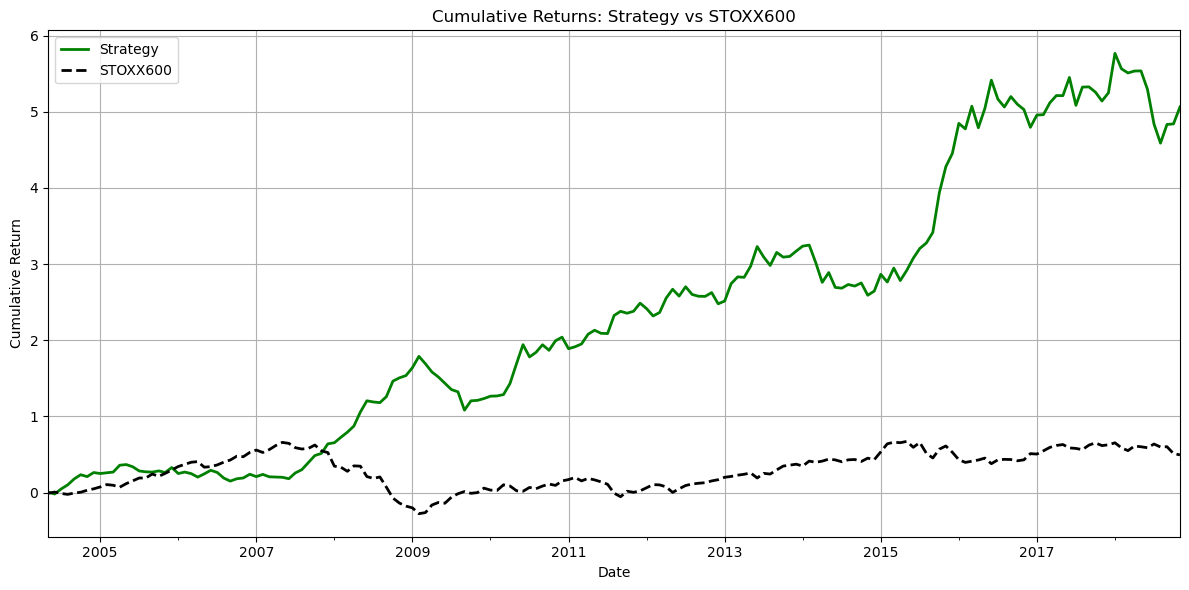

In [ ]:
# Converti gli indici a 'periodo mensile' per entrambi i DataFrame
if not isinstance(results_big_vol.index, pd.PeriodIndex):
    results_big_vol.index = pd.to_datetime(results_big_vol.index).to_period('M')
# Solo se l'indice non è già un PeriodIndex
if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

# Fai join sulle date mensili
aligned_big_vol = results_big_vol[['cumulative_return']].join(
    stoxx600_returns[['stoxx600_cumulative_return']],
    how='inner'
)

# Torna a datetime per plotting (opzionale ma utile)
aligned_big_vol.index = aligned_big_vol.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
aligned_big_vol['cumulative_return'].plot(label='Strategy', linewidth=2, color='green')
aligned_big_vol['stoxx600_cumulative_return'].plot(label='STOXX600', linewidth=2, linestyle='--', color='black')

plt.title("Cumulative Returns: Strategy vs STOXX600")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
# Se gli indici non sono PeriodIndex, converti a periodo mensile
if not isinstance(results_big_vol.index, pd.PeriodIndex):
    results_big_vol.index = pd.to_datetime(results_big_vol.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

# Join tra i due DataFrame sullo stesso indice mensile
df_big_vol = results_big_vol[['long_short_scaled']].join(
    stoxx600_returns[['stoxx600_monthly_return']],
    how='inner'
)

# Converti l'indice a datetime per plotting o regressione
df_big_vol.index = df_big_vol.index.to_timestamp()

df_big_vol

,long_short_scaled,stoxx600_monthly_return
2004-05-01,-0.021590,-0.008868
2004-06-01,-0.006571,0.016587
2004-07-01,-0.009984,-0.018517
2004-08-01,0.055530,-0.011717
2004-09-01,-0.000917,0.017592
...,...,...
2018-07-01,-0.044555,0.030742
2018-08-01,0.030755,-0.023876
2018-09-01,0.023460,0.002407
2018-10-01,-0.003677,-0.056292


In [64]:
# Assicura che df_3ff abbia PeriodIndex mensile
if not isinstance(df_3ff.index, pd.PeriodIndex):
    df_3ff.index = df_3ff.index.to_period('M')

if not isinstance(df_big_vol.index, pd.PeriodIndex):
    df_big_vol.index = pd.to_datetime(df_big_vol.index).to_period('M')

# Esegui la join
df_big_vol = df_big_vol.join(
    df_3ff[['Mkt-RF', 'SMB', 'HML']],
    how='inner'
)

# Riconverti l'indice in datetime per regressione o plotting
df_big_vol.index = df_big_vol.index.to_timestamp()

# Visualizza anteprima
df_big_vol.head()


,long_short_scaled,stoxx600_monthly_return,Mkt-RF,SMB,HML
2004-05-01,-0.021590,-0.008868,1.42,-1.01,-0.89
2004-06-01,-0.006571,0.016587,1.98,1.11,0.99
2004-07-01,-0.009984,-0.018517,-3.12,0.08,0.45
2004-08-01,0.055530,-0.011717,0.37,-0.46,1.32
2004-09-01,-0.000917,0.017592,4.01,0.22,0.74


In [65]:
# Assicura che df_3ff abbia PeriodIndex mensile
if not isinstance(df_irx.index, pd.PeriodIndex):
    df_irx.index = df_irx.index.to_period('M')

# Assicura che anche df_big abbia PeriodIndex mensile prima della join
if not isinstance(df_big_vol.index, pd.PeriodIndex):
    df_big_vol.index = pd.to_datetime(df_big_vol.index).to_period('M')

# Esegui la join
df_big_vol = df_big_vol.join(
    df_irx[['IRX_yield']],
    how='inner'
)

# Riconverti l'indice in datetime per regressione o plotting
df_big_vol.index = df_big_vol.index.to_timestamp()

# Visualizza anteprima
df_big_vol.head()

,long_short_scaled,stoxx600_monthly_return,Mkt-RF,SMB,HML,IRX_yield
2004-05-01,-0.021590,-0.008868,1.42,-1.01,-0.89,1.052
2004-06-01,-0.006571,0.016587,1.98,1.11,0.99,1.303
2004-07-01,-0.009984,-0.018517,-3.12,0.08,0.45,1.412
2004-08-01,0.055530,-0.011717,0.37,-0.46,1.32,1.568
2004-09-01,-0.000917,0.017592,4.01,0.22,0.74,1.674


In [67]:
results_big_vol = analyze_strategy_metrics(
    df=df_big_vol,
    market_col='stoxx600_monthly_return',
    strategy_col='long_short_scaled',
    rf_col="IRX_yield"
)

for metric, value in results_big_vol.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, (float, int)) else f"{metric}: {value}")


CAPM alpha: -0.0127
CAPM t-stat: -0.7640
FF3 alpha: -0.0144
FF3 t-stat: -0.8493
Sharpe ratio: -0.1246
Sortino ratio: -0.0990
Information ratio: -0.0798
Annualized volatility: 0.7683
Downside volatility: 0.9700
Max drawdown: -1.7410


# Med Cap

In [33]:
results_med = run_skew_momentum_strategy(df_prices, df_weights, df_daily,
                                     start_date="2004-04-01", end_date="2018-11-30", x=12,
                                     skew_pct=0.2, momentum_pct=0.2, cap_level=2)

In [34]:
results_med['cumulative_return'] = (1 + results_med['long_short']).cumprod() - 1
results_med

,long_short,cumulative_return
Dates,,
2004-04-30,0.004266,0.004266
2004-05-31,0.100041,0.104734
2004-06-30,0.091828,0.206179
2004-07-30,0.044682,0.260074
2004-08-31,0.014985,0.278956
...,...,...
2018-06-29,-0.044673,11.384244
2018-07-31,0.074925,12.312134
2018-08-31,-0.006142,12.230374


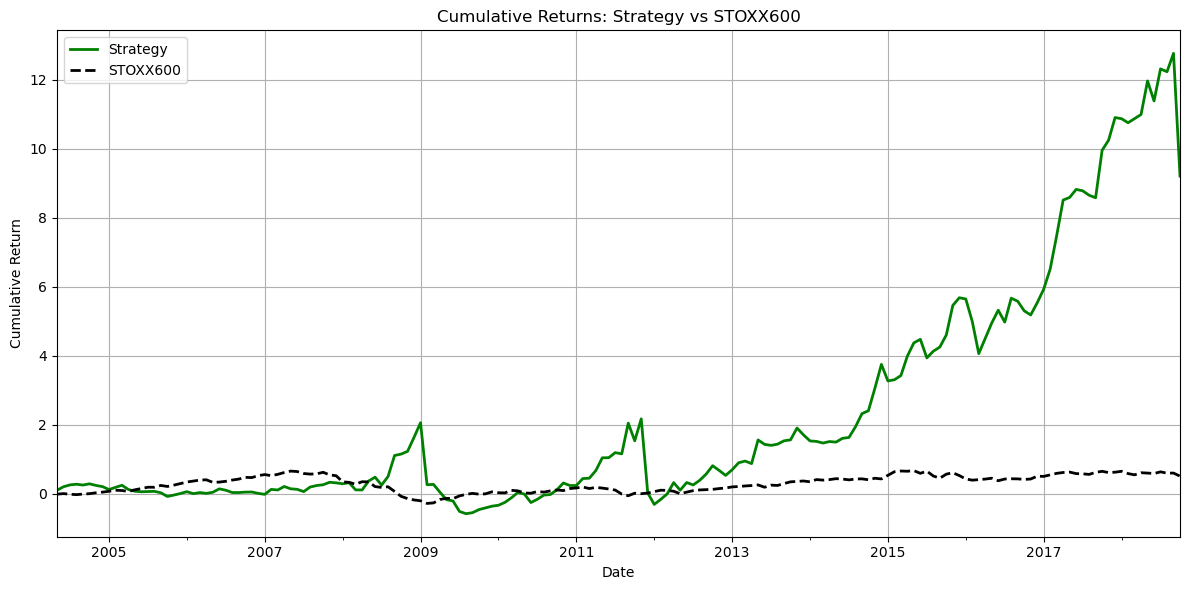

In [37]:
#results_med.index = pd.to_datetime(results_med.index).to_period('M')
#stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

# Fai join sulle date mensili
aligned_med = results_med[['cumulative_return']].join(
    stoxx600_returns[['stoxx600_cumulative_return']],
    how='inner'
)

# Torna a datetime per plotting (opzionale ma utile)
aligned_med.index = aligned_med.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
aligned_med['cumulative_return'].plot(label='Strategy', linewidth=2, color='green')
aligned_med['stoxx600_cumulative_return'].plot(label='STOXX600', linewidth=2, linestyle='--', color='black')

plt.title("Cumulative Returns: Strategy vs STOXX600")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
# Se gli indici non sono PeriodIndex, converti a periodo mensile
if not isinstance(results_med.index, pd.PeriodIndex):
    results_med.index = pd.to_datetime(results_med.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

# Join tra i due DataFrame sullo stesso indice mensile
df_med = results_med[['long_short']].join(
    stoxx600_returns[['stoxx600_monthly_return']],
    how='inner'
)

# Converti l'indice a datetime per plotting o regressione
df_med.index = df_med.index.to_timestamp()

df_med

,long_short,stoxx600_monthly_return
Dates,,
2004-05-01,0.100041,-0.008868
2004-06-01,0.091828,0.016587
2004-07-01,0.044682,-0.018517
2004-08-01,0.014985,-0.011717
2004-09-01,-0.018072,0.017592
...,...,...
2018-06-01,-0.044673,-0.008171
2018-07-01,0.074925,0.030742
2018-08-01,-0.006142,-0.023876


In [40]:
# Assicura che df_3ff abbia PeriodIndex mensile
if not isinstance(df_3ff.index, pd.PeriodIndex):
    df_3ff.index = df_3ff.index.to_period('M')

# Assicura che anche df_big abbia PeriodIndex mensile prima della join
if not isinstance(df_med.index, pd.PeriodIndex):
    df_med.index = pd.to_datetime(df_med.index).to_period('M')

# Esegui la join
df_med = df_med.join(
    df_3ff[['Mkt-RF', 'SMB', 'HML']],
    how='inner'
)

# Riconverti l'indice in datetime per regressione o plotting
df_med.index = df_med.index.to_timestamp()

# Visualizza anteprima
df_med.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML
2004-05-01,0.100041,-0.008868,1.42,-1.01,-0.89
2004-06-01,0.091828,0.016587,1.98,1.11,0.99
2004-07-01,0.044682,-0.018517,-3.12,0.08,0.45
2004-08-01,0.014985,-0.011717,0.37,-0.46,1.32
2004-09-01,-0.018072,0.017592,4.01,0.22,0.74


In [42]:
# Assicura che df_3ff abbia PeriodIndex mensile
if not isinstance(df_irx.index, pd.PeriodIndex):
    df_irx.index = df_irx.index.to_period('M')

# Assicura che anche df_big abbia PeriodIndex mensile prima della join
if not isinstance(df_med.index, pd.PeriodIndex):
    df_med.index = pd.to_datetime(df_med.index).to_period('M')

# Esegui la join
df_med = df_med.join(
    df_irx[['IRX_yield']],
    how='inner'
)

# Riconverti l'indice in datetime per regressione o plotting
df_med.index = df_med.index.to_timestamp()

# Visualizza anteprima
df_med.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML,IRX_yield
2004-05-01,0.100041,-0.008868,1.42,-1.01,-0.89,1.052
2004-06-01,0.091828,0.016587,1.98,1.11,0.99,1.303
2004-07-01,0.044682,-0.018517,-3.12,0.08,0.45,1.412
2004-08-01,0.014985,-0.011717,0.37,-0.46,1.32,1.568
2004-09-01,-0.018072,0.017592,4.01,0.22,0.74,1.674


In [43]:
results_med = analyze_strategy_metrics(
    df=df_med,
    market_col='stoxx600_monthly_return',
    strategy_col='long_short',
    rf_col="IRX_yield"
)

for metric, value in results_med.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, (float, int)) else f"{metric}: {value}")


CAPM alpha: 0.0252
CAPM t-stat: 2.4656
FF3 alpha: 0.0260
FF3 t-stat: 2.5237
Sharpe ratio: 0.0883
Sortino ratio: 0.1051
Information ratio: 0.1484
Annualized volatility: 0.4659
Downside volatility: 0.3979
Max drawdown: -0.8611


## With volatility strategy

In [53]:
results_med_vol = run_skew_momentum_strategy_vol(
    df_prices=df_prices,         # prezzi mensili con indice datetime
    df_weights=df_weights,       # capitalizzazioni/pesi mensili
    df_daily=df_daily,            # prezzi giornalieri (usati per skew)
    start_date="2004-04-01",
    end_date="2018-11-30",
    x=6,                             # momentum da t-12 a t-2
    skew_pct=0.2,                     # prendi bottom/top 20% skew
    momentum_pct=0.2,                 # prendi top/bottom 20% momentum
    cap_level=2,                      # solo mid cap
    vol_window=3,                     # rolling window di 6 mesi
    target_annual_vol=0.12            # target volatility annualizzata
)

In [54]:
results_med_vol['cumulative_return'] = (1 + results_med_vol['long_short_scaled']).cumprod() - 1
results_med_vol

,long_short_scaled,cumulative_return
2004-05-31,-0.009485,-0.009485
2004-06-30,0.037164,0.027326
2004-07-30,0.063320,0.092376
2004-08-31,0.062550,0.160704
2004-09-30,0.034549,0.200805
...,...,...
2018-07-31,-0.051892,4.339043
2018-08-31,0.011225,4.398973
2018-09-28,0.047360,4.654668
2018-10-31,0.061208,5.000780


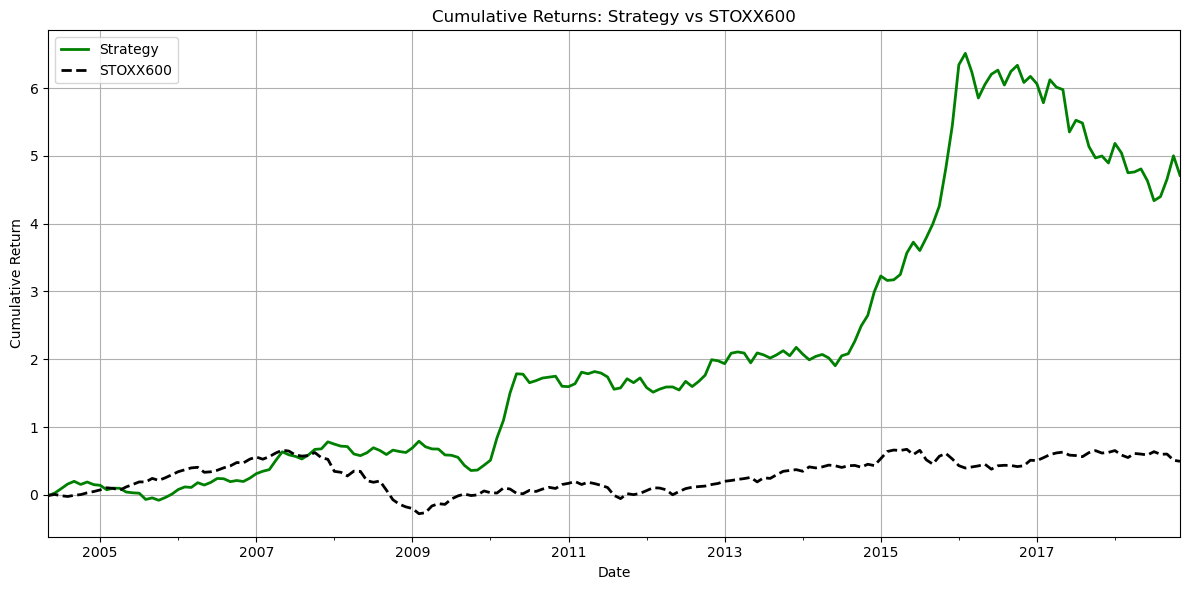

In [55]:
# Converti gli indici a 'periodo mensile' per entrambi i DataFrame
if not isinstance(results_med_vol.index, pd.PeriodIndex):
    results_med_vol.index = pd.to_datetime(results_med_vol.index).to_period('M')
# Solo se l'indice non è già un PeriodIndex
if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

# Fai join sulle date mensili
aligned_med_vol = results_med_vol[['cumulative_return']].join(
    stoxx600_returns[['stoxx600_cumulative_return']],
    how='inner'
)

# Torna a datetime per plotting (opzionale ma utile)
aligned_med_vol.index = aligned_med_vol.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
aligned_med_vol['cumulative_return'].plot(label='Strategy', linewidth=2, color='green')
aligned_med_vol['stoxx600_cumulative_return'].plot(label='STOXX600', linewidth=2, linestyle='--', color='black')

plt.title("Cumulative Returns: Strategy vs STOXX600")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
# Se gli indici non sono PeriodIndex, converti a periodo mensile
if not isinstance(results_med_vol.index, pd.PeriodIndex):
    results_med_vol.index = pd.to_datetime(results_med_vol.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

# Join tra i due DataFrame sullo stesso indice mensile
df_med_vol = results_med_vol[['long_short_scaled']].join(
    stoxx600_returns[['stoxx600_monthly_return']],
    how='inner'
)

# Converti l'indice a datetime per plotting o regressione
df_med_vol.index = df_med_vol.index.to_timestamp()

df_med_vol

,long_short_scaled,stoxx600_monthly_return
2004-05-01,-0.009485,-0.008868
2004-06-01,0.037164,0.016587
2004-07-01,0.063320,-0.018517
2004-08-01,0.062550,-0.011717
2004-09-01,0.034549,0.017592
...,...,...
2018-07-01,-0.051892,0.030742
2018-08-01,0.011225,-0.023876
2018-09-01,0.047360,0.002407
2018-10-01,0.061208,-0.056292


In [58]:
# Assicura che df_3ff abbia PeriodIndex mensile
if not isinstance(df_3ff.index, pd.PeriodIndex):
    df_3ff.index = df_3ff.index.to_period('M')

if not isinstance(df_med_vol.index, pd.PeriodIndex):
    df_med_vol.index = pd.to_datetime(df_med_vol.index).to_period('M')

# Esegui la join
df_med_vol = df_med_vol.join(
    df_3ff[['Mkt-RF', 'SMB', 'HML']],
    how='inner'
)

# Riconverti l'indice in datetime per regressione o plotting
df_med_vol.index = df_med_vol.index.to_timestamp()

# Visualizza anteprima
df_med_vol.head()


,long_short_scaled,stoxx600_monthly_return,Mkt-RF,SMB,HML
2004-05-01,-0.009485,-0.008868,1.42,-1.01,-0.89
2004-06-01,0.037164,0.016587,1.98,1.11,0.99
2004-07-01,0.063320,-0.018517,-3.12,0.08,0.45
2004-08-01,0.062550,-0.011717,0.37,-0.46,1.32
2004-09-01,0.034549,0.017592,4.01,0.22,0.74


In [59]:
# Assicura che df_3ff abbia PeriodIndex mensile
if not isinstance(df_irx.index, pd.PeriodIndex):
    df_irx.index = df_irx.index.to_period('M')

# Assicura che anche df_big abbia PeriodIndex mensile prima della join
if not isinstance(df_med_vol.index, pd.PeriodIndex):
    df_med_vol.index = pd.to_datetime(df_med_vol.index).to_period('M')

# Esegui la join
df_med_vol = df_med_vol.join(
    df_irx[['IRX_yield']],
    how='inner'
)

# Riconverti l'indice in datetime per regressione o plotting
df_med_vol.index = df_med_vol.index.to_timestamp()

# Visualizza anteprima
df_med_vol.head()

,long_short_scaled,stoxx600_monthly_return,Mkt-RF,SMB,HML,IRX_yield
2004-05-01,-0.009485,-0.008868,1.42,-1.01,-0.89,1.052
2004-06-01,0.037164,0.016587,1.98,1.11,0.99,1.303
2004-07-01,0.063320,-0.018517,-3.12,0.08,0.45,1.412
2004-08-01,0.062550,-0.011717,0.37,-0.46,1.32,1.568
2004-09-01,0.034549,0.017592,4.01,0.22,0.74,1.674


In [66]:
results_med_vol = analyze_strategy_metrics(
    df=df_med_vol,
    market_col='stoxx600_monthly_return',
    strategy_col='long_short_scaled',
    rf_col="IRX_yield"
)

for metric, value in results_med_vol.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, (float, int)) else f"{metric}: {value}")


CAPM alpha: 0.0113
CAPM t-stat: 3.1554
FF3 alpha: 0.0115
FF3 t-stat: 3.2201
Sharpe ratio: -0.0259
Sortino ratio: -0.0511
Information ratio: 0.1258
Annualized volatility: 0.1639
Downside volatility: 0.0880
Max drawdown: -0.2892


# Small Cap

In [44]:
# Strategia solo su large cap
results_small = run_skew_momentum_strategy(df_prices, df_weights, df_daily,
                                     start_date="2004-04-01", end_date="2018-11-30", x=12,
                                     skew_pct=0.2, momentum_pct=0.2, cap_level=1)

In [45]:
results_small['cumulative_return'] = (1 + results_small['long_short']).cumprod() - 1
results_small

,long_short,cumulative_return
Dates,,
2004-04-30,-0.035679,-0.035679
2004-05-31,0.040094,0.002984
2004-06-30,0.065888,0.069069
2004-07-30,-0.001360,0.067615
2004-08-31,0.010490,0.078815
...,...,...
2018-06-29,-0.232051,1.983394
2018-07-31,0.031392,2.077050
2018-08-31,-0.221526,1.395403


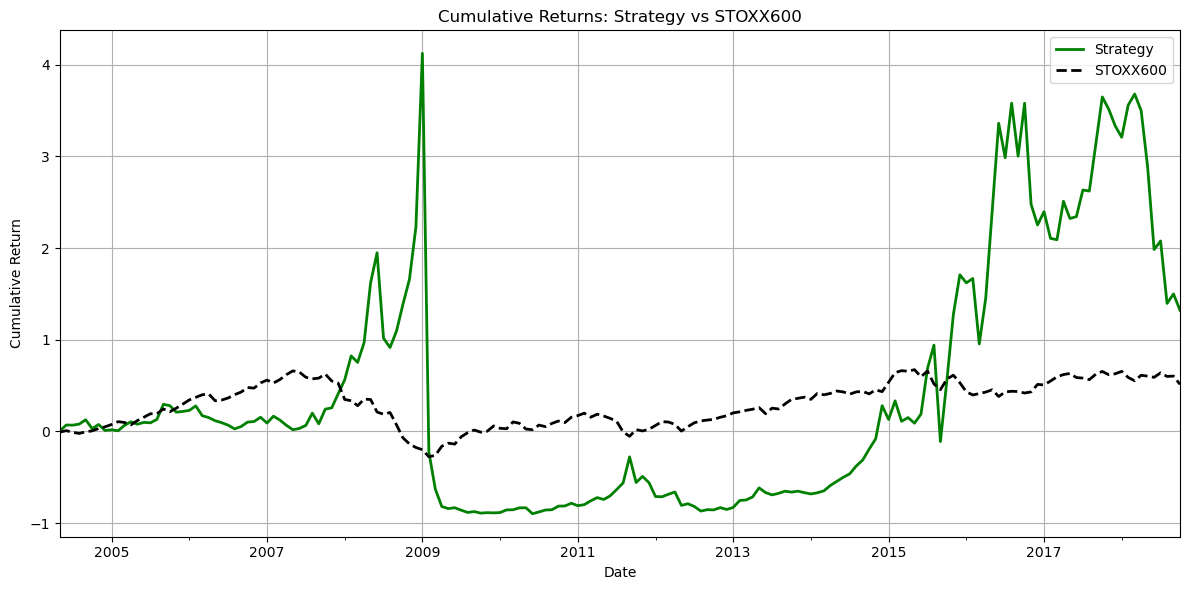

In [48]:
# Converti gli indici a 'periodo mensile' per entrambi i DataFrame
if not isinstance(results_small.index, pd.PeriodIndex):
    results_small.index = pd.to_datetime(results_small.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

# Fai join sulle date mensili
aligned_small = results_small[['cumulative_return']].join(
    stoxx600_returns[['stoxx600_cumulative_return']],
    how='inner'
)

# Torna a datetime per plotting (opzionale ma utile)
aligned_small.index = aligned_small.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
aligned_small['cumulative_return'].plot(label='Strategy', linewidth=2, color='green')
aligned_small['stoxx600_cumulative_return'].plot(label='STOXX600', linewidth=2, linestyle='--', color='black')

plt.title("Cumulative Returns: Strategy vs STOXX600")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
# Se gli indici non sono PeriodIndex, converti a periodo mensile
if not isinstance(results_small.index, pd.PeriodIndex):
    results_small.index = pd.to_datetime(results_small.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

# Join tra i due DataFrame sullo stesso indice mensile
df_small= results_small[['long_short']].join(
    stoxx600_returns[['stoxx600_monthly_return']],
    how='inner'
)

# Converti l'indice a datetime per plotting o regressione
df_small.index = df_small.index.to_timestamp()

df_small

,long_short,stoxx600_monthly_return
Dates,,
2004-05-01,0.040094,-0.008868
2004-06-01,0.065888,0.016587
2004-07-01,-0.001360,-0.018517
2004-08-01,0.010490,-0.011717
2004-09-01,0.043873,0.017592
...,...,...
2018-06-01,-0.232051,-0.008171
2018-07-01,0.031392,0.030742
2018-08-01,-0.221526,-0.023876


In [50]:
# Assicura che df_3ff abbia PeriodIndex mensile
if not isinstance(df_3ff.index, pd.PeriodIndex):
    df_3ff.index = df_3ff.index.to_period('M')

# Assicura che anche df_big abbia PeriodIndex mensile prima della join
if not isinstance(df_small.index, pd.PeriodIndex):
    df_small.index = pd.to_datetime(df_small.index).to_period('M')

# Esegui la join
df_small = df_small.join(
    df_3ff[['Mkt-RF', 'SMB', 'HML']],
    how='inner'
)

# Riconverti l'indice in datetime per regressione o plotting
df_small.index = df_small.index.to_timestamp()

# Visualizza anteprima
df_small.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML
2004-05-01,0.040094,-0.008868,1.42,-1.01,-0.89
2004-06-01,0.065888,0.016587,1.98,1.11,0.99
2004-07-01,-0.001360,-0.018517,-3.12,0.08,0.45
2004-08-01,0.010490,-0.011717,0.37,-0.46,1.32
2004-09-01,0.043873,0.017592,4.01,0.22,0.74


In [51]:
# Assicura che df_3ff abbia PeriodIndex mensile
if not isinstance(df_irx.index, pd.PeriodIndex):
    df_irx.index = df_irx.index.to_period('M')

# Assicura che anche df_big abbia PeriodIndex mensile prima della join
if not isinstance(df_small.index, pd.PeriodIndex):
    df_small.index = pd.to_datetime(df_small.index).to_period('M')

# Esegui la join
df_small = df_small.join(
    df_irx[['IRX_yield']],
    how='inner'
)

# Riconverti l'indice in datetime per regressione o plotting
df_small.index = df_small.index.to_timestamp()

# Visualizza anteprima
df_small.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML,IRX_yield
2004-05-01,0.040094,-0.008868,1.42,-1.01,-0.89,1.052
2004-06-01,0.065888,0.016587,1.98,1.11,0.99,1.303
2004-07-01,-0.001360,-0.018517,-3.12,0.08,0.45,1.412
2004-08-01,0.010490,-0.011717,0.37,-0.46,1.32,1.568
2004-09-01,0.043873,0.017592,4.01,0.22,0.74,1.674


In [52]:
results_small = analyze_strategy_metrics(
    df=df_small,
    market_col='stoxx600_monthly_return',
    strategy_col='long_short',
    rf_col="IRX_yield"
)

for metric, value in results_small.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, (float, int)) else f"{metric}: {value}")


CAPM alpha: 0.0295
CAPM t-stat: 1.9817
FF3 alpha: 0.0309
FF3 t-stat: 2.0719
Sharpe ratio: 0.0822
Sortino ratio: 0.1097
Information ratio: 0.1259
Annualized volatility: 0.6765
Downside volatility: 0.5122
Max drawdown: -0.9802


## With volatility strategy

In [68]:
results_small_vol = run_skew_momentum_strategy_vol(
    df_prices=df_prices,         # prezzi mensili con indice datetime
    df_weights=df_weights,       # capitalizzazioni/pesi mensili
    df_daily=df_daily,            # prezzi giornalieri (usati per skew)
    start_date="2004-04-01",
    end_date="2018-11-30",
    x=6,                             # momentum da t-12 a t-2
    skew_pct=0.2,                     # prendi bottom/top 20% skew
    momentum_pct=0.2,                 # prendi top/bottom 20% momentum
    cap_level=1,                      # solo mid cap
    vol_window=3,                     # rolling window di 6 mesi
    target_annual_vol=0.12            # target volatility annualizzata
)

In [ ]:
results_small_vol['cumulative_return'] = (1 + results_small_vol['long_short_scaled']).cumprod() - 1
results_small_vol

In [ ]:
# Converti gli indici a 'periodo mensile' per entrambi i DataFrame
if not isinstance(results_small_vol.index, pd.PeriodIndex):
    results_small_vol.index = pd.to_datetime(results_small_vol.index).to_period('M')
# Solo se l'indice non è già un PeriodIndex
if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

# Fai join sulle date mensili
aligned_small_vol = results_small_vol[['cumulative_return']].join(
    stoxx600_returns[['stoxx600_cumulative_return']],
    how='inner'
)

# Torna a datetime per plotting (opzionale ma utile)
aligned_small_vol.index = aligned_small_vol.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
aligned_small_vol['cumulative_return'].plot(label='Strategy', linewidth=2, color='green')
aligned_small_vol['stoxx600_cumulative_return'].plot(label='STOXX600', linewidth=2, linestyle='--', color='black')

plt.title("Cumulative Returns: Strategy vs STOXX600")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [69]:
# Se gli indici non sono PeriodIndex, converti a periodo mensile
if not isinstance(results_small_vol.index, pd.PeriodIndex):
    results_small_vol.index = pd.to_datetime(results_small_vol.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

# Join tra i due DataFrame sullo stesso indice mensile
df_small_vol = results_small_vol[['long_short_scaled']].join(
    stoxx600_returns[['stoxx600_monthly_return']],
    how='inner'
)

# Converti l'indice a datetime per plotting o regressione
df_small_vol.index = df_small_vol.index.to_timestamp()

df_small_vol

,long_short_scaled,stoxx600_monthly_return
2004-05-01,0.049298,-0.008868
2004-06-01,0.029793,0.016587
2004-07-01,0.094235,-0.018517
2004-08-01,0.083276,-0.011717
2004-09-01,-0.030001,0.017592
...,...,...
2018-07-01,-0.081288,0.030742
2018-08-01,-0.006721,-0.023876
2018-09-01,-0.072474,0.002407
2018-10-01,0.013113,-0.056292


In [70]:
# Assicura che df_3ff abbia PeriodIndex mensile
if not isinstance(df_3ff.index, pd.PeriodIndex):
    df_3ff.index = df_3ff.index.to_period('M')

if not isinstance(df_small_vol.index, pd.PeriodIndex):
    df_small_vol.index = pd.to_datetime(df_small_vol.index).to_period('M')

# Esegui la join
df_small_vol = df_small_vol.join(
    df_3ff[['Mkt-RF', 'SMB', 'HML']],
    how='inner'
)

# Riconverti l'indice in datetime per regressione o plotting
df_small_vol.index = df_small_vol.index.to_timestamp()

# Visualizza anteprima
df_small_vol.head()


,long_short_scaled,stoxx600_monthly_return,Mkt-RF,SMB,HML
2004-05-01,0.049298,-0.008868,1.42,-1.01,-0.89
2004-06-01,0.029793,0.016587,1.98,1.11,0.99
2004-07-01,0.094235,-0.018517,-3.12,0.08,0.45
2004-08-01,0.083276,-0.011717,0.37,-0.46,1.32
2004-09-01,-0.030001,0.017592,4.01,0.22,0.74


In [71]:
# Assicura che df_3ff abbia PeriodIndex mensile
if not isinstance(df_irx.index, pd.PeriodIndex):
    df_irx.index = df_irx.index.to_period('M')

# Assicura che anche df_big abbia PeriodIndex mensile prima della join
if not isinstance(df_small_vol.index, pd.PeriodIndex):
    df_small_vol.index = pd.to_datetime(df_small_vol.index).to_period('M')

# Esegui la join
df_small_vol = df_small_vol.join(
    df_irx[['IRX_yield']],
    how='inner'
)

# Riconverti l'indice in datetime per regressione o plotting
df_small_vol.index = df_small_vol.index.to_timestamp()

# Visualizza anteprima
df_small_vol.head()

,long_short_scaled,stoxx600_monthly_return,Mkt-RF,SMB,HML,IRX_yield
2004-05-01,0.049298,-0.008868,1.42,-1.01,-0.89,1.052
2004-06-01,0.029793,0.016587,1.98,1.11,0.99,1.303
2004-07-01,0.094235,-0.018517,-3.12,0.08,0.45,1.412
2004-08-01,0.083276,-0.011717,0.37,-0.46,1.32,1.568
2004-09-01,-0.030001,0.017592,4.01,0.22,0.74,1.674


In [72]:
results_small_vol = analyze_strategy_metrics(
    df=df_small_vol,
    market_col='stoxx600_monthly_return',
    strategy_col='long_short_scaled',
    rf_col="IRX_yield"
)

for metric, value in results_small_vol.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, (float, int)) else f"{metric}: {value}")


CAPM alpha: 0.0053
CAPM t-stat: 1.3970
FF3 alpha: 0.0061
FF3 t-stat: 1.6192
Sharpe ratio: -0.1422
Sortino ratio: -0.1862
Information ratio: 0.0163
Annualized volatility: 0.1783
Downside volatility: 0.1510
Max drawdown: -0.6622
